In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='	')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [ ]:
total_acc = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

plt.figure()


In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

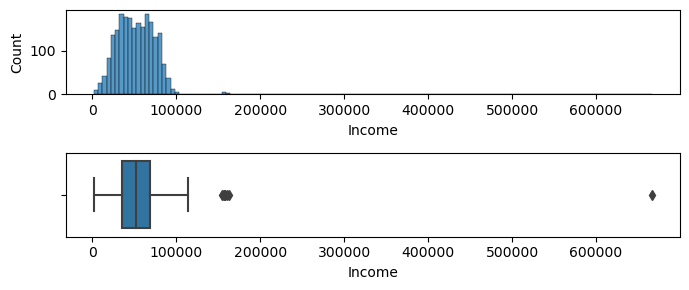

In [3]:
plt.figure(figsize=(7,3))
plt.subplot(211)
# sns.histplot(df[df['Income']<300000]['Income'])
sns.histplot(df['Income'])
plt.subplot(212)
sns.boxplot(x=df['Income'])
plt.tight_layout()
plt.show()

Since the distribution is very far from normal (right or positive skew), I decided to fill the null values with the median

In [3]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income'] = df['Income'].astype('int')
df.isnull().sum().any()

False

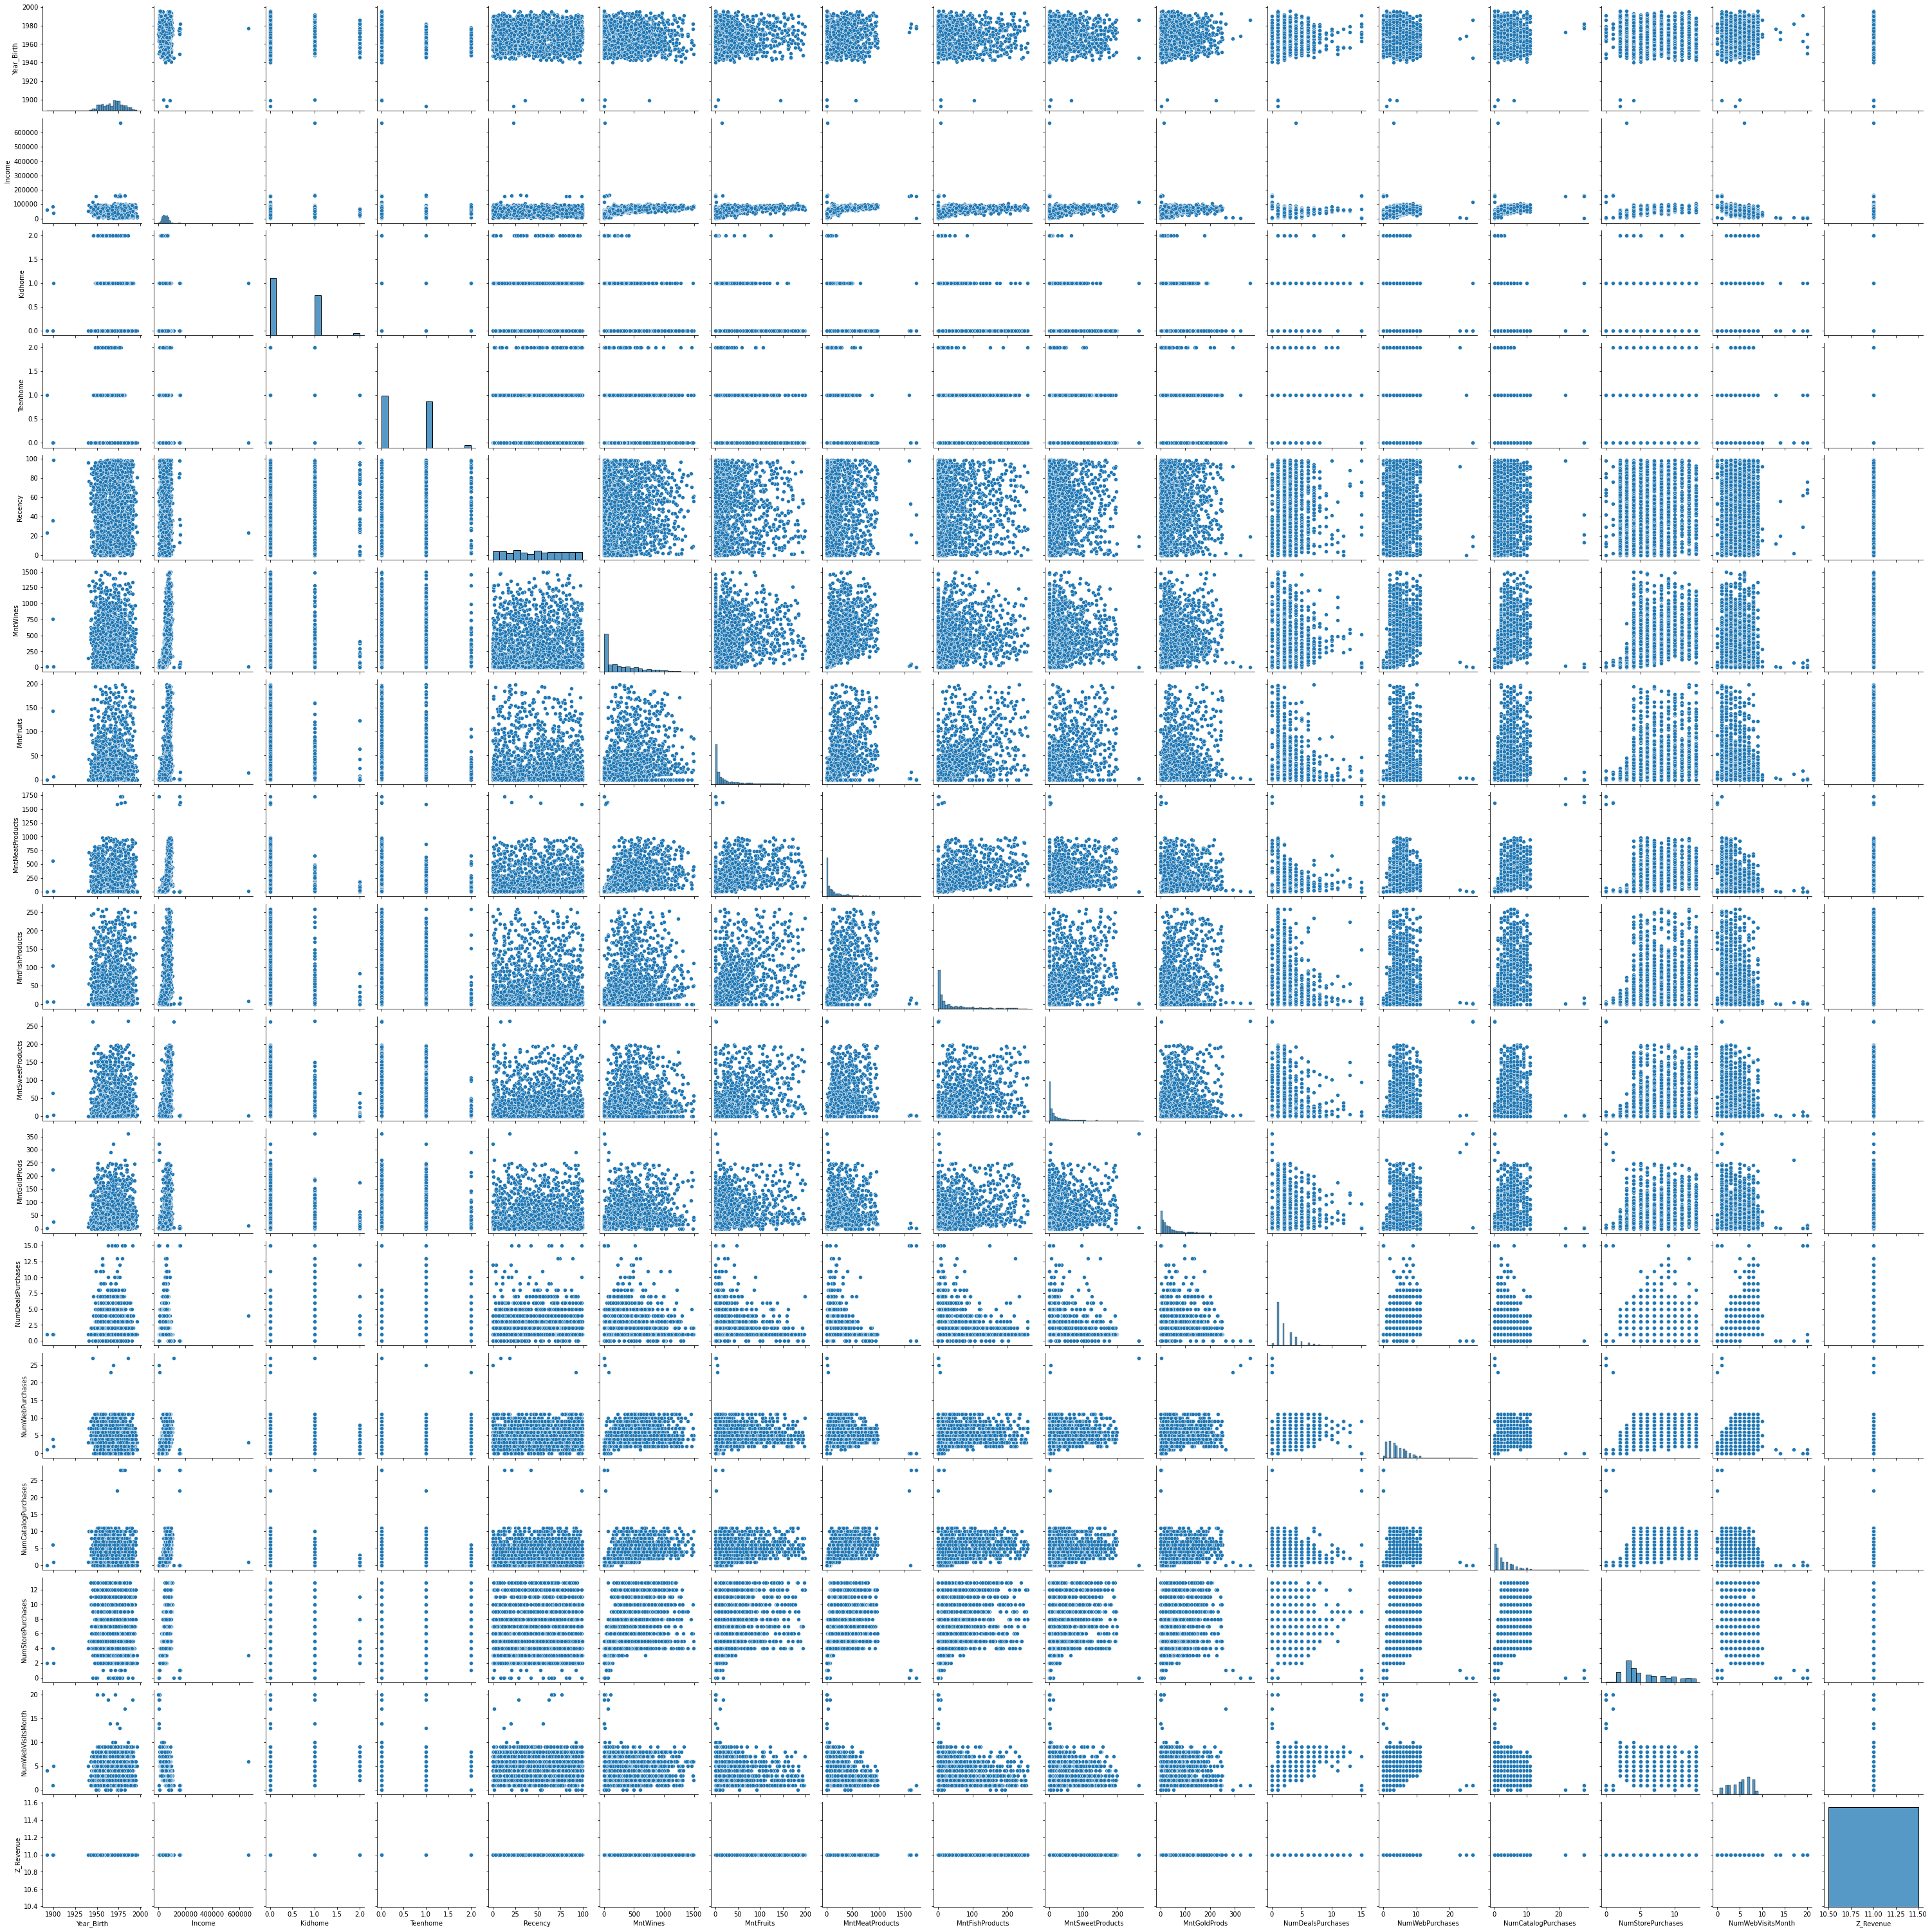

In [7]:
sns.pairplot(df[['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_Revenue']])

Drop columns that won't be used for further analysis. Keep in mind that the dropped columns by no means unnecessary, it just not relevant for the target of this analysis which is clustering, except for 'ID' column.

For addition, Z_CostContact and Z_Revenue also dropped because based on the descriptive analysis, all rows have the same value, therefore serves no purpose for clustering analysis.

Columns that related to marketing campaign plus 'Complain' are saved into a new table which will be used for later analysis.

In [4]:
cols_del = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response', 'Z_CostContact', 'Z_Revenue']
df_subset = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']]
df.drop(cols_del, axis=1, inplace=True)

In [6]:
df.head()

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0        1957  Graduation         Single   58138        0         0   
1        1954  Graduation         Single   46344        1         1   
2        1965  Graduation       Together   71613        0         0   
3        1984  Graduation       Together   26646        1         0   
4        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0                   10                  4                  7  
1                    1                  2                  5  
2                    2                 10                  4  
3                    0                  4                  6  
4                    3                  6                  5

---

## Feature Engineering

### Numerical Column

In [5]:
# convert Dt_Customer column to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True, dayfirst=True)

In [6]:
print("The newest customer's enrolment date in therecords:",df['Dt_Customer'].max())
print("The oldest customer's enrolment date in the records:",df['Dt_Customer'].min())

The newest customer's enrolment date in therecords: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [6]:
# Create Customer_For feature to see how long a person has been a customer
df['Customer_For'] = (df['Dt_Customer'].max()-df['Dt_Customer']).dt.days

# add an age column using year_birth
df['Age'] = df['Dt_Customer'].dt.year.max() - df['Year_Birth']

# Create total purchases and total products bought
df['Total_Products'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Count the amount of children in the family or house
df['Children'] = df['Kidhome'] + df['Teenhome']

# drop Year_Birth and Customer_For column, no more use
df.drop('Year_Birth', axis=1, inplace=True)
df.drop('Dt_Customer', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2240 non-null   object
 1   Marital_Status       2240 non-null   object
 2   Income               2240 non-null   int64 
 3   Kidhome              2240 non-null   int64 
 4   Teenhome             2240 non-null   int64 
 5   Recency              2240 non-null   int64 
 6   MntWines             2240 non-null   int64 
 7   MntFruits            2240 non-null   int64 
 8   MntMeatProducts      2240 non-null   int64 
 9   MntFishProducts      2240 non-null   int64 
 10  MntSweetProducts     2240 non-null   int64 
 11  MntGoldProds         2240 non-null   int64 
 12  NumDealsPurchases    2240 non-null   int64 
 13  NumWebPurchases      2240 non-null   int64 
 14  NumCatalogPurchases  2240 non-null   int64 
 15  NumStorePurchases    2240 non-null   int64 
 16  NumWeb

## Outlier Detection

To get a glimpse of how the numerical data are distributed, I choose to use box-plot

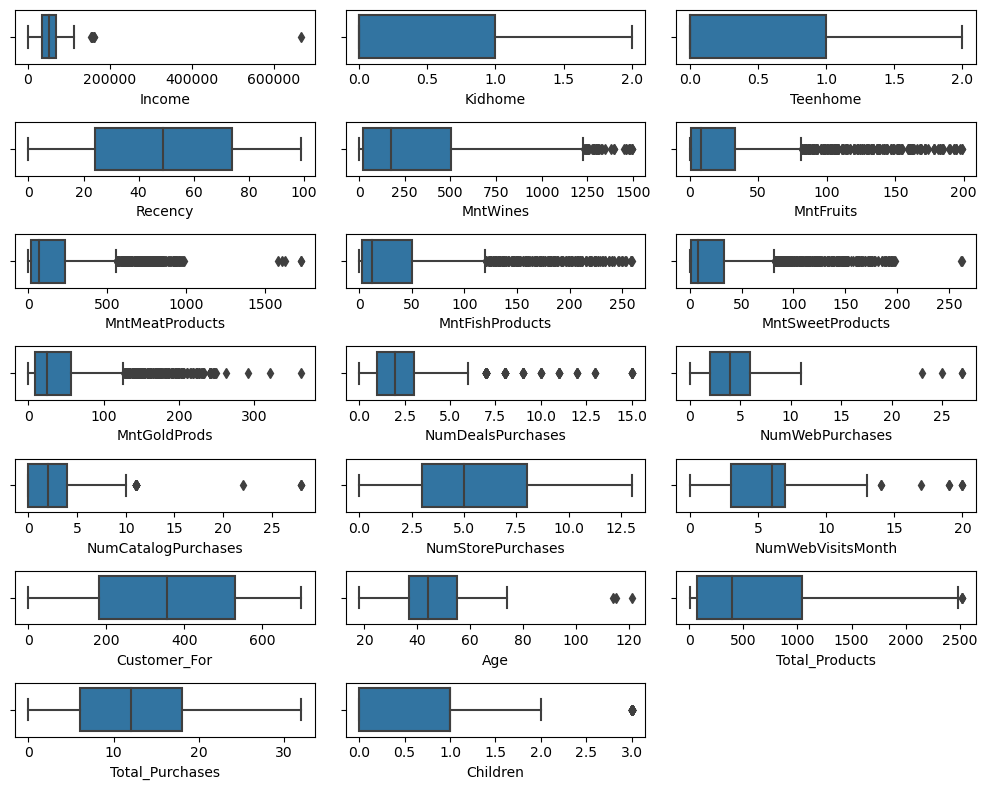

In [9]:
num_int = df.select_dtypes(include='int64').shape[1]
plt.figure(figsize=(10, 8))
for i, col in enumerate(df.select_dtypes(include='int64').columns):
    plt.subplot(int(-(num_int//-3)), 3, i+1)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

There are a lot of outliers but most notably are outlier in income and Age feature

In [8]:
df[(df['Income']>200000) | (df['Age']>100)]

Education Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
192     2n Cycle       Divorced   36640        1         0       99        15   
239     2n Cycle         Single   60182        0         1       23         8   
339          PhD       Together   83532        0         0       36       755   
2233  Graduation       Together  666666        1         0       23         9   

      MntFruits  MntMeatProducts  MntFishProducts  ...  NumDealsPurchases  \
192           6                8                7  ...                  1   
239           0                5                7  ...                  1   
339         144              562              104  ...                  1   
2233         14               18                8  ...                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                 2                    1                  2   
239                 1                    0                  2   
339                 4                    6                  4   
2233                3                    1                  3   

      NumWebVisitsMonth  Customer_For  Age  Total_Products  Total_Purchases  \
192                   5           276  114              65                5   
239                   4            43  121              22                3   
339                   1           276  115            1853               14   
2233                  6           392   37              62                7   

      Children  
192          1  
239          1  
339          0  
2233         1  

[4 rows x 22 columns]

since there are only four records having a very different value, might as well drop it so the model won't get ruined.

In [7]:
drop_idx = df[(df['Income']>200000) | (df['Age']>100)].index

df.drop(drop_idx, inplace=True)

#also apply the filtering to df_subset
df_subset.drop(drop_idx, inplace=True)

print(len(df), len(df[(df['Income']>200000) | (df['Age']>100)]))

2236 0


/var/folders/s9/lg95mzg96bnd11x1mf3c8skw0000gn/T/ipykernel_54493/1017571676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.drop(drop_idx, inplace=True)


### Categorical Column

In [10]:
df.describe(include=['O'])

Education Marital_Status
count         2236           2236
unique           5              8
top     Graduation        Married
freq          1126            864

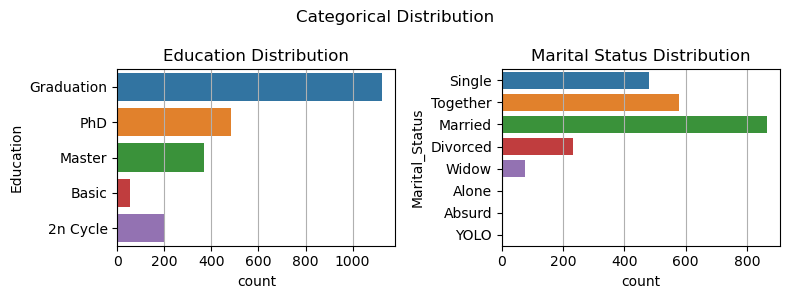

In [13]:
plt.figure(figsize=(8,3))
plt.subplot(121)
sns.countplot(data=df, y='Education')
plt.title('Education Distribution')
plt.grid(axis='x')
plt.subplot(122)
sns.countplot(data=df, y='Marital_Status')
plt.title('Marital Status Distribution')
plt.grid(axis='x')
plt.suptitle('Categorical Distribution')
plt.tight_layout()
plt.show()

In [14]:
display(df['Education'].value_counts())
display(df['Marital_Status'].value_counts())

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Since there are some redundant categories, I decided to map them

In [8]:
# Mapping Education feature
df['Education'] = df['Education'].map({
    'Graduation':'Graduate', 
    'PhD':'Postgrad', 
    'Master':'Postgrad', 
    'Basic':'Undergrad', 
    '2n Cycle':'Undergrad'})

# Mapping Marital_Status feature
df['Marital_Status'] = df['Marital_Status'].map({
    'Single':'Alone',
    'Together':'Partner',
    'Married':'Partner',
    'Divorced':'Alone',
    'Alone':'Alone',
    'Widow':'Alone',
    'Absurd':'Alone',
    'YOLO':'Alone'
})

# making sure we did the mapping correctly
df.describe(include=['O'])

Education Marital_Status
count       2236           2236
unique         3              2
top     Graduate        Partner
freq        1126           1442

In [9]:
# Create Family_size feature using the feature created
df['Family_Size'] = df['Marital_Status'].map({'Alone':1, 'Partner':2}) + df['Children']

# Classify whether a customer is a parent or not
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x>0 else 0)

## Feature Preprocessing

Firstly, transforming categorical features to numerical.

Convert Education feature using Label Encoder because there is arguably an ordinal information in this feature (also to reduce the amount of dimension). For Marital_Status, since there are only two categories, we can just map it to 0 and 1.

In [10]:
# Label Encoder for Education
LE = LabelEncoder()
LE.fit(df['Education'])
df['Education'] = LE.transform(df['Education'])

# Marital_Status mapping
df['Marital_Status'] = df['Marital_Status'].map({'Alone':0, 'Partner':1})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2236 non-null   int64
 1   Marital_Status       2236 non-null   int64
 2   Income               2236 non-null   int64
 3   Kidhome              2236 non-null   int64
 4   Teenhome             2236 non-null   int64
 5   Recency              2236 non-null   int64
 6   MntWines             2236 non-null   int64
 7   MntFruits            2236 non-null   int64
 8   MntMeatProducts      2236 non-null   int64
 9   MntFishProducts      2236 non-null   int64
 10  MntSweetProducts     2236 non-null   int64
 11  MntGoldProds         2236 non-null   int64
 12  NumDealsPurchases    2236 non-null   int64
 13  NumWebPurchases      2236 non-null   int64
 14  NumCatalogPurchases  2236 non-null   int64
 15  NumStorePurchases    2236 non-null   int64
 16  NumWebVisitsMonth    223

In [11]:
print(len(df))
print(len(df_subset))

2236
2236


In [12]:
df.to_csv('main_data_final.csv', index=False)
df_subset.to_csv('additional_data_final.csv', index=False)

### Scaling

Since there are a lot of outliers preserved in the dataset, it might be better to use standard scaler since this method is more robust to outliers. Also, many clustering algorithm are sensitive to the scale of variables.

Standard scaler will only be applied to actual numerical data, so it will be applied to all data with int datatype excluding Education, Marital_Status, and Is_Parent column.

In [13]:
df = pd.read_csv('main_data_final.csv')
df_subset = pd.read_csv('additional_data_final.csv')

In [14]:
# copy the original data to preserve the original value
df_scaled = df.copy()

scaled_columns = list(df_scaled.drop(['Education', 'Marital_Status', 'Is_Parent'], axis=1).columns)

SS = StandardScaler()
SS.fit(df_scaled[scaled_columns])
df_scaled[scaled_columns] = SS.transform(df_scaled[scaled_columns])

In [41]:
df_scaled.head()

Unnamed: 0  Education  Marital_Status    Income   Kidhome  Teenhome  \
0   -1.733980          0               0  0.288947 -0.824939 -0.930615   
1   -1.732432          0               0 -0.262003  1.032627  0.905974   
2   -1.730884          0               1  0.918423 -0.824939 -0.930615   
3   -1.729336          0               1 -1.182183  1.032627 -0.930615   
4   -1.727788          1               1  0.296188  1.032627 -0.930615   

    Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0  0.306856  0.983228   1.554170         1.679746  ...             2.509801   
1 -0.383971 -0.871064  -0.636431        -0.713455  ...            -0.568970   
2 -0.798467  0.362159   0.572177        -0.177201  ...            -0.226884   
3 -0.798467 -0.871064  -0.560893        -0.651409  ...            -0.911056   
4  1.550344 -0.389661   0.421101        -0.217088  ...             0.115201   

   NumStorePurchases  NumWebVisitsMonth  Customer_For       Age  \
0          -0.552429           0.692865      1.529793  1.016868   
1          -1.167738          -0.131421     -1.191143  1.273264   
2           1.293496          -0.543564     -0.206659  0.333146   
3          -0.552429           0.280722     -1.062517 -1.290693   
4           0.062879          -0.131421     -0.953679 -1.034298   

   Total_Products  Total_Purchases  Children  Family_Size  Is_Parent  
0        1.680176         1.312080 -1.264308    -1.758810          0  
1       -0.962202        -1.186198  1.395139     0.445618          1  
2        0.282541         1.034493 -1.264308    -0.656596          0  
3       -0.918994        -0.908611  0.065416     0.445618          1  
4       -0.305762         0.201734  0.065416     0.445618          1  

[5 rows x 25 columns]

### Dimensionality Reduction

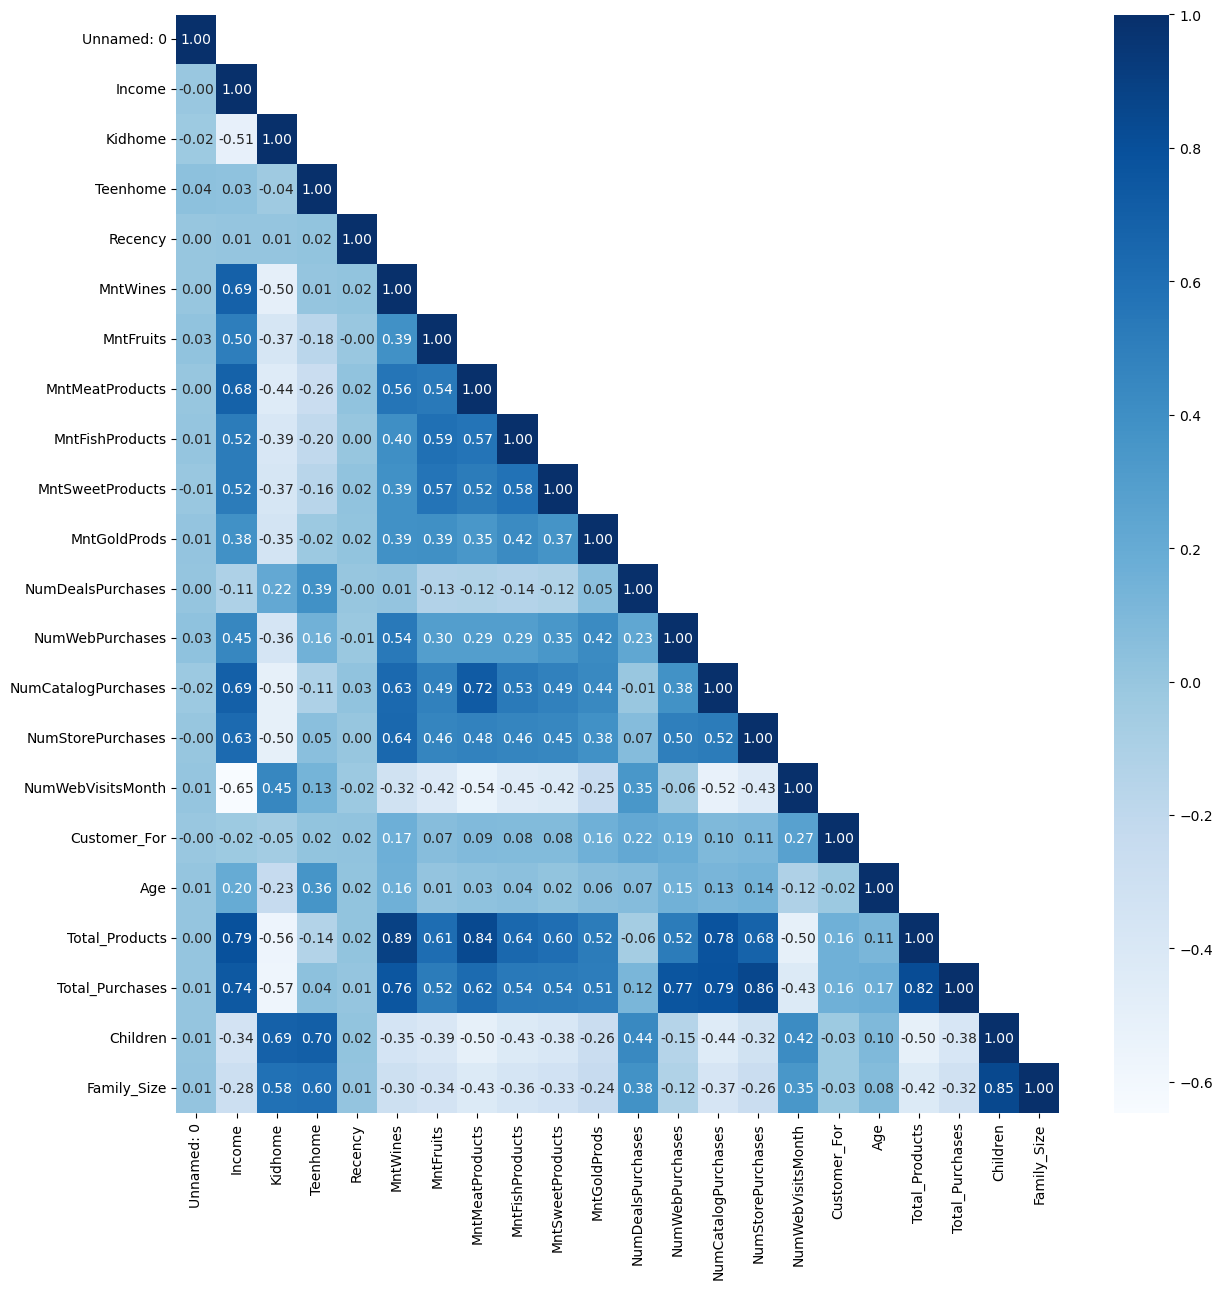

In [42]:
corr = df_scaled.drop(['Education', 'Marital_Status', 'Is_Parent'], axis=1).corr()
corr = corr.where(np.tril(np.ones(corr.shape), k=0).astype('bool'))

plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.tight_layout()

24 features is a lot for clustering algorithm, and looking at the correlation plot above, a lot of features have somewhat high relation to the other. So to make features less redundant, reducing the amount of feature using PCA while also mantaining important information is necessary.

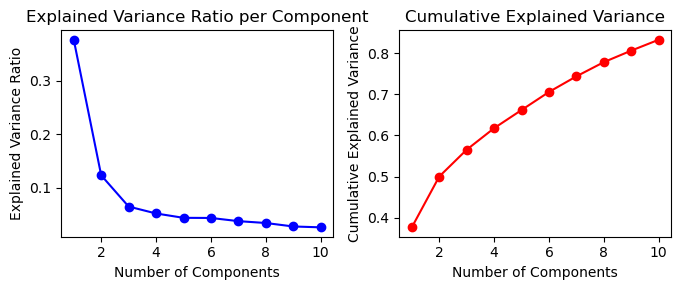

In [43]:
max_components = 10

pca = PCA(n_components=max_components, random_state=7)
pca.fit(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    
# Plot the explained variance ratio
plt.figure(figsize=(7,3))

plt.subplot(121)
plt.plot(range(1, max_components+1), explained_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Component')
plt.subplot(122)
plt.plot(range(1, max_components+1), cumulative_explained_variance, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

Looking at the graph above, it's probably safe to take 3 or 4 as the number of components. But for this case, I'll take 3 just so we can have better visualization.

In [15]:
pca = PCA(n_components=3, random_state=77)
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

print("PCA Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Cumulative Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))
print(df_pca.shape)

PCA Variance Ratio: [0.39376237 0.12910586 0.06817612]
PCA Cumulative Variance Ratio: [0.39376237 0.52286824 0.59104436]
(2236, 3)


In [16]:
df_pca.mean(axis=0)

array([-6.99102871e-17,  4.53821040e-17,  1.17675696e-17])

In [17]:
from mpl_toolkits import mplot3d

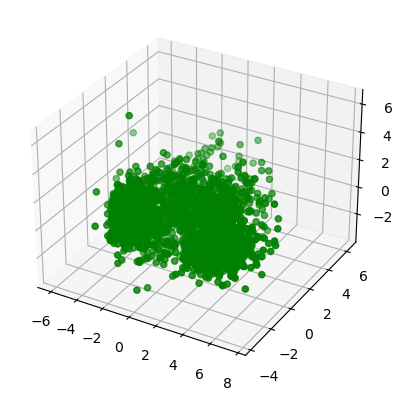

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,2], color='green')
plt.show()

## Clustering

In [19]:
from sklearn.cluster import KMeans

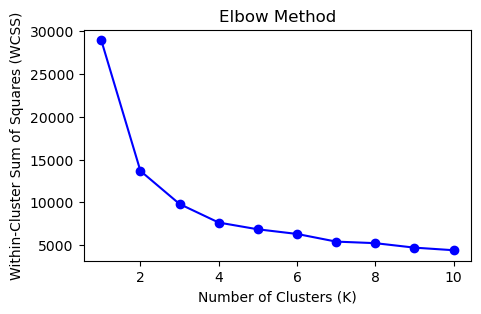

In [20]:
k_values = range(1, 11)

wcss = []

for k in k_values:
    # Fit the K-means model
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=7)
    kmeans.fit(df_pca)
    
    # Calculate the WCSS and append it to the list
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(5,3))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

Judging from the plot above. it's kind of hard to pick a straight forward number of classes. 2 might suites the elbow method the best but possibly not enough number of classes, so I think 4 might be the best mid point choice.

In [21]:
num_class = 4
kmeans = KMeans(n_clusters=num_class, n_init='auto', random_state=17)
cluster = kmeans.fit_predict(df_pca)

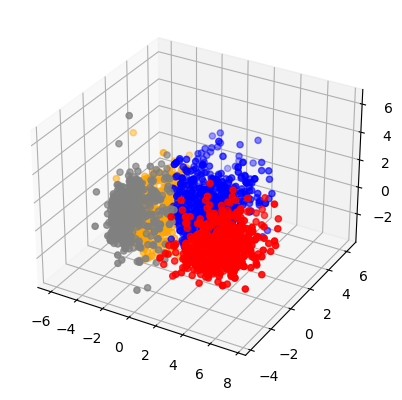

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cluster_colours = {
    0: 'blue',
    1: 'grey',
    2: 'red',
    3: 'orange'
}

colours = [cluster_colours[i] for i in cluster]

ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,2], c=colours)
plt.show()

## Model Evaluation

For the purpose of evaluating the model, the data with original value will be used, therefore we need to first merge all the data including the clusters.

In [25]:
df = pd.concat([df, df_subset], axis=1)
df['cluster'] = cluster + 1
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2236 non-null   int64
 1   Marital_Status       2236 non-null   int64
 2   Income               2236 non-null   int64
 3   Kidhome              2236 non-null   int64
 4   Teenhome             2236 non-null   int64
 5   Recency              2236 non-null   int64
 6   MntWines             2236 non-null   int64
 7   MntFruits            2236 non-null   int64
 8   MntMeatProducts      2236 non-null   int64
 9   MntFishProducts      2236 non-null   int64
 10  MntSweetProducts     2236 non-null   int64
 11  MntGoldProds         2236 non-null   int64
 12  NumDealsPurchases    2236 non-null   int64
 13  NumWebPurchases      2236 non-null   int64
 14  NumCatalogPurchases  2236 non-null   int64
 15  NumStorePurchases    2236 non-null   int64
 16  NumWebVisitsMonth    223

None

Education  Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
0          0               0   58138        0         0       58       635   
1          0               0   46344        1         1       38        11   
2          0               1   71613        0         0       26       426   
3          0               1   26646        1         0       26        11   
4          1               1   58293        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Family_Size  Is_Parent  \
0         88              546              172  ...            1          0   
1          1                6                2  ...            3          1   
2         49              127              111  ...            2          0   
3          4               20               10  ...            3          1   
4         43              118               46  ...            3          1   

   AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  cluster  
0         0         1        3  
1         0         0        4  
2         0         0        3  
3         0         0        2  
4         0         0        1  

[5 rows x 32 columns]

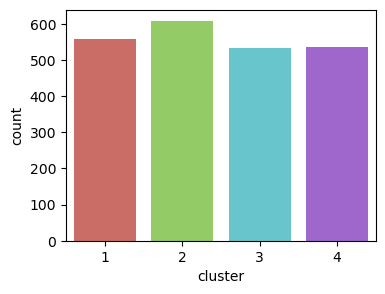

2    609
1    559
4    535
3    533
Name: cluster, dtype: int64

In [106]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='cluster', palette=sns.color_palette("hls", 4))
plt.show()
df['cluster'].value_counts()

The distribution of clusters seem to be very well separated

### Purchase Behaviour

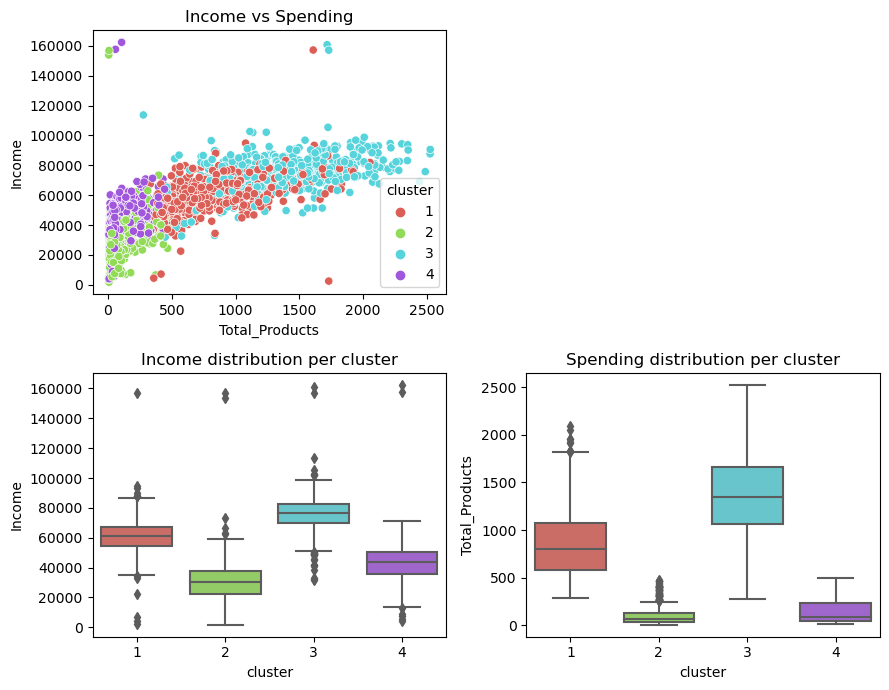

In [57]:
plt.figure(figsize=(9,7))
plt.subplot(221)
sns.scatterplot(data=df, x='Total_Products', y='Income', hue='cluster', palette=sns.color_palette("hls", 4))
plt.title("Income vs Spending")
plt.subplot(223)
sns.boxplot(data=df, y='Income', x='cluster', palette=sns.color_palette("hls", 4))
plt.title("Income distribution per cluster")
plt.subplot(224)
sns.boxplot(data=df, y='Total_Products', x='cluster', palette=sns.color_palette("hls", 4))
plt.title("Spending distribution per cluster")
plt.tight_layout()
plt.show()

There are some generalized points that we can take from the plot above:
* cluster 1: high-medium income, medium spending
* cluster 2: low income, low spending
* cluster 3: high income, high spending
* cluster 4: low-medium income, low spending

In [72]:
# customer response rate

responses_total = df.groupby('cluster', as_index=False)\
[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
responses_perc = (responses_total[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]/len(df))*100
responses_perc['cluster'] = responses_total['cluster']

display(responses_total)
display(responses_perc)

cluster  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0        1            25            10            44            76   
1        2             1             0            50             3   
2        3           113            18            42            67   
3        4             5             2            27            21   

   AcceptedCmp5  
0            22  
1             0  
2           140  
3             0

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0      1.118068      0.447227      1.967800      3.398927      0.983900   
1      0.044723      0.000000      2.236136      0.134168      0.000000   
2      5.053667      0.805009      1.878354      2.996422      6.261181   
3      0.223614      0.089445      1.207513      0.939177      0.000000   

   cluster  
0        1  
1        2  
2        3  
3        4

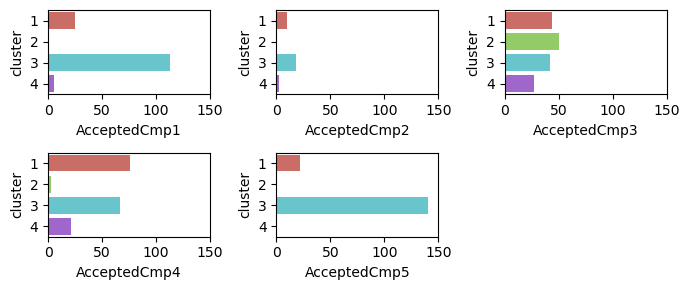

In [93]:
cmpcol = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

plt.figure(figsize=(7,3))
for i, col in enumerate(cmpcol):
    plt.subplot(2,3,i+1)
    sns.barplot(data=responses_total, y='cluster', x=col, orient='h', palette=sns.color_palette("hls", 4))
    plt.xlim(0,150)
plt.tight_layout()
plt.show()

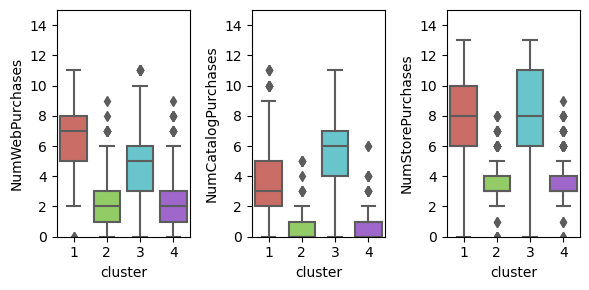

In [105]:
purchase_col = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
plt.figure(figsize=(6,3))
for i, col in enumerate(purchase_col):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='cluster', y=col, palette=sns.color_palette("hls", 4))
    plt.ylim(0, 15)
plt.tight_layout()
plt.show()

### Customer Personal Info

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2236 non-null   int64
 1   Marital_Status       2236 non-null   int64
 2   Income               2236 non-null   int64
 3   Kidhome              2236 non-null   int64
 4   Teenhome             2236 non-null   int64
 5   Recency              2236 non-null   int64
 6   MntWines             2236 non-null   int64
 7   MntFruits            2236 non-null   int64
 8   MntMeatProducts      2236 non-null   int64
 9   MntFishProducts      2236 non-null   int64
 10  MntSweetProducts     2236 non-null   int64
 11  MntGoldProds         2236 non-null   int64
 12  NumDealsPurchases    2236 non-null   int64
 13  NumWebPurchases      2236 non-null   int64
 14  NumCatalogPurchases  2236 non-null   int64
 15  NumStorePurchases    2236 non-null   int64
 16  NumWebVisitsMonth    223

<Figure size 640x480 with 0 Axes>

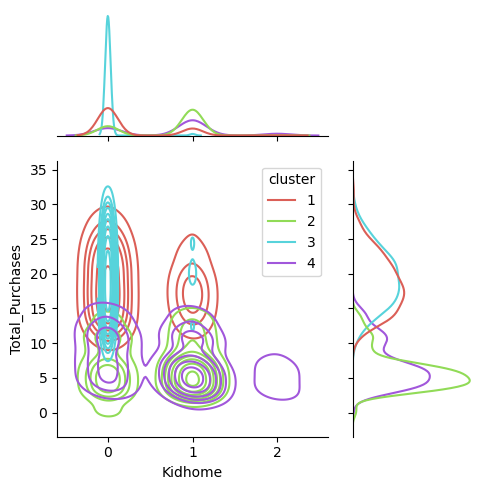

<Figure size 640x480 with 0 Axes>

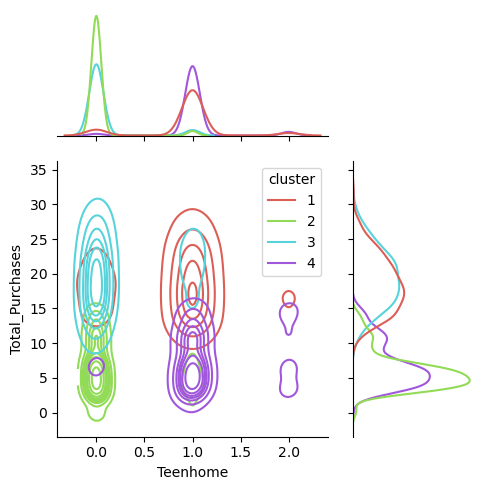

<Figure size 640x480 with 0 Axes>

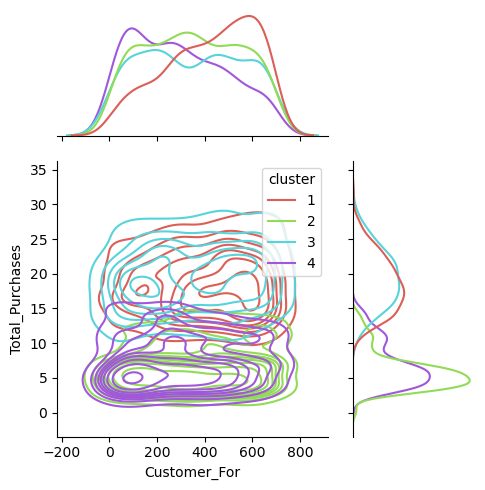

<Figure size 640x480 with 0 Axes>

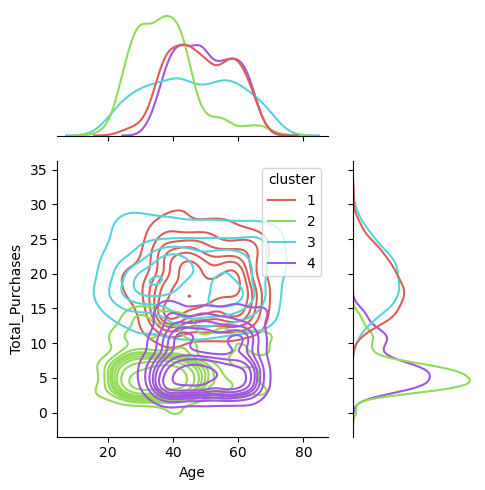

<Figure size 640x480 with 0 Axes>

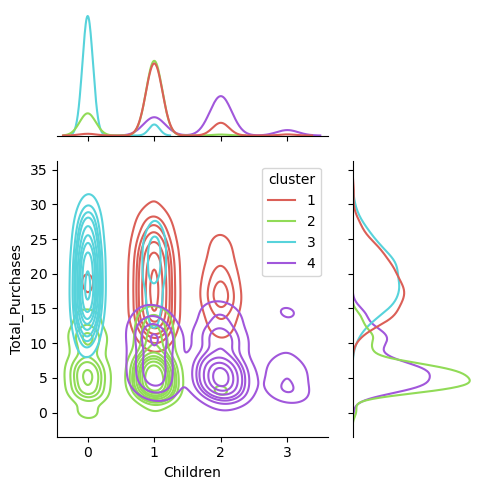

<Figure size 640x480 with 0 Axes>

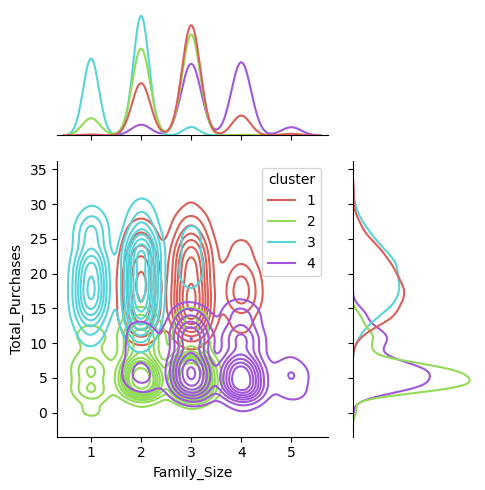

/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 640x480 with 0 Axes>

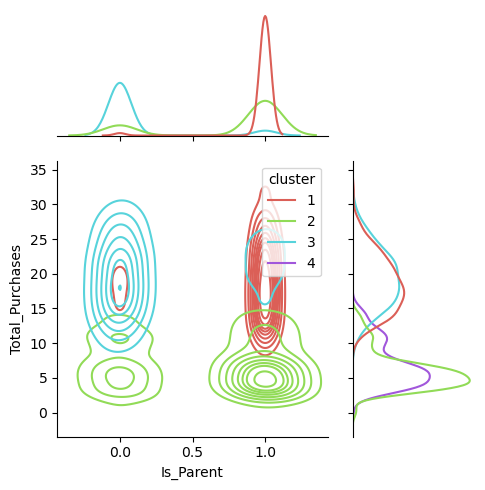

<Figure size 640x480 with 0 Axes>

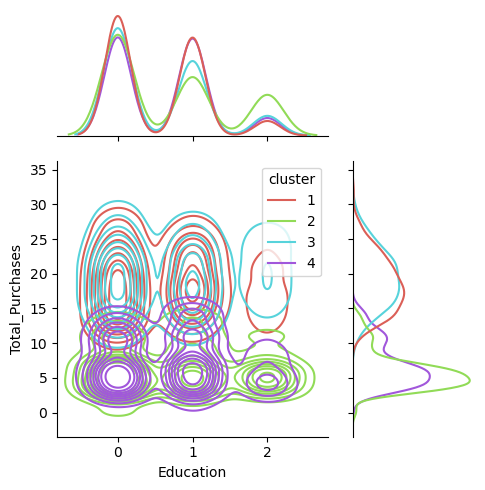

In [117]:
pers_col = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education"]

for col in pers_col:
    plt.figure()
    sns.jointplot(data=df, x=col, y='Total_Purchases', hue ='cluster', kind="kde", height=5, ratio=2, palette=sns.color_palette("hls", 4))
    plt.show()

### General Personal Conclusion

**Cluster 1**
* middle aged with a partner, mostly have children
* medium income familiy

**Cluster 2**
* majority of them have partner with a child, probably a new young couple
* low income family
* relatively younger than other clusters

**Cluster 3**
* majority of them have no child eventhough most of them have couple
* high income customer
* small family with some having a children max
* coming from all age

**Cluster 4**
* definitely parents
* medium income family
* relatively bigger family with member around 3-4
* aged older than other clusters